In [1]:
# import the dependencies
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
CSV_PATH = os.path.join("static", "data", "csv")
IMG_PATH = os.path.join("static", "img")
FILE_NAME = "full_inventory.csv"
FILE_PATH = os.path.join(CSV_PATH, FILE_NAME)

In [3]:
# Read in the inventory file
# because 'NA' is the code for North America, we need to change pandas.read_csv default behavior
# for reading missing values (na's)...

df = pd.read_csv(FILE_PATH, keep_default_na=False, na_values=['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan',
    '1.#IND', '1.#QNAN', 'N/A', 'NULL', 'NaN', 'n/a', 'nan',
    'null'])

C:\Users\dadra\anaconda\Anaconda3\envs\PythonWebMongo\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (10,11,13,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Note that these are not unique station counts - these are unique station + element counts.   
# If a station records 10 meterological elements, it will be counted 10 times.
df.continent.value_counts()

North America    571534
Oceania           62309
Europe            23427
Asia              12709
South America      8525
Africa             5109
Antartica           500
Name: continent, dtype: int64

In [5]:
# 
df.country.describe()

count            684293
unique              219
top       United States
freq             503430
Name: country, dtype: object

In [6]:
#  Removing the duplicated station ids gives us the number of distinct stations per continent in the archive
df.drop_duplicates('station_id').continent.value_counts()

North America    76073
Oceania          17283
Europe            6964
South America     6506
Asia              5717
Africa            2116
Antartica          107
Name: continent, dtype: int64

In [7]:
df.drop_duplicates('station_id').country.value_counts()[:10]

United States    61613
Australia        17088
Canada            8780
Brazil            5989
Mexico            5249
India             3807
Sweden            1721
South Africa      1166
Russia            1123
Germany           1123
Name: country, dtype: int64

In [8]:
element_by_continent = pd.crosstab(df.element, df.continent).loc[['PRCP', 'TMAX', 'TMIN', 'SNOW', 'SNWD'], :]
element_by_continent

continent,Africa,Antartica,Asia,Europe,North America,Oceania,South America
element,,,,,,,
PRCP,2104,55,5698,6703,74440,17263,6500
TMAX,690,61,1609,4521,30949,1801,463
TMIN,688,63,1609,4522,30838,1799,467
SNOW,8,16,153,91,65842,130,4
SNWD,86,37,995,4658,52549,130,106


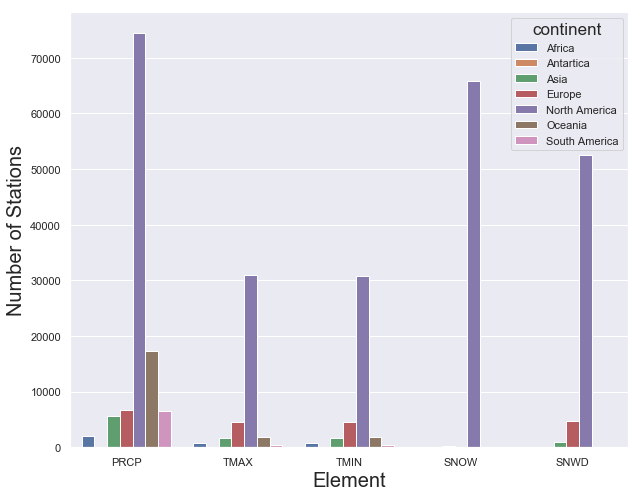

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12e56d439b0>)

In [9]:
# Plot the above cross tab
def plot_continent_bars (df, filename, img_path=IMG_PATH):
    sns.set(style="whitegrid")
    #sns.set_context("paper")
    sns.set(rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

    ct = pd.crosstab(df.element, df.continent).loc[['PRCP', 'TMAX', 'TMIN', 'SNOW', 'SNWD'], :]
    stacked = ct.stack().reset_index().rename(columns={0:'value'})

    fig, ax = plt.subplots(figsize=(10,8))

    # plot grouped bar chart
    sns.barplot(x=stacked.element, y=stacked.value, hue=stacked.continent)

    ax.set_xlabel("Element")
    ax.set_ylabel("Number of Stations")
    #ax.set_title("")
    
    output_file = os.path.join(img_path, filename)
    fig.savefig(output_file)
    plt.show()

    return fig, ax

plot_continent_bars(df, "continent-bars")

# Examine the Stations in North America

In [9]:
na_df = df.query("continent == 'North America'")
print(na_df.shape)
na_df.head()

(571534, 19)


,station_id,latitude,longitude,element,first_year,last_year,years,elevation,state,name,gsn_flag,hcn_crn_flag,wmo_id,state_name,country_code,country,continent_code,continent,type
0,ACW00011604,17.1167,-61.7833,TMAX,1949,1949,1,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN,NaN,AC,Antigua and Barbuda,NA,North America,W
1,ACW00011604,17.1167,-61.7833,TMIN,1949,1949,1,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN,NaN,AC,Antigua and Barbuda,NA,North America,W
2,ACW00011604,17.1167,-61.7833,PRCP,1949,1949,1,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN,NaN,AC,Antigua and Barbuda,NA,North America,W
3,ACW00011604,17.1167,-61.7833,SNOW,1949,1949,1,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN,NaN,AC,Antigua and Barbuda,NA,North America,W
4,ACW00011604,17.1167,-61.7833,SNWD,1949,1949,1,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN,NaN,AC,Antigua and Barbuda,NA,North America,W


In [10]:
# What is the distribution of stations among countries in North America?
na_df.drop_duplicates('station_id').country.value_counts(normalize=True)

United States                         0.809919
Canada                                0.115415
Mexico                                0.069000
Puerto Rico [United States]           0.002774
Greenland [Denmark]                   0.000907
Virgin Islands [United States]        0.000565
Bahamas, The                          0.000500
Panama                                0.000131
Honduras                              0.000105
Costa Rica                            0.000079
Nicaragua                             0.000079
Cuba                                  0.000079
Dominican Republic                    0.000066
Trinidad and Tobago                   0.000053
El Salvador                           0.000039
Guadeloupe [France]                   0.000039
Jamaica                               0.000039
Martinique [France]                   0.000026
Antigua and Barbuda                   0.000026
Saint Lucia                           0.000026
Bermuda [United Kingdom]              0.000026
Saint Pierre 

In [11]:
na_stations = na_df.drop_duplicates('station_id')

In [12]:
na_stations.shape

(76073, 19)

In [13]:
na_stations.head()

,station_id,latitude,longitude,element,first_year,last_year,years,elevation,state,name,gsn_flag,hcn_crn_flag,wmo_id,state_name,country_code,country,continent_code,continent,type
0,ACW00011604,17.1167,-61.7833,TMAX,1949,1949,1,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN,NaN,AC,Antigua and Barbuda,NA,North America,W
11,ACW00011647,17.1333,-61.7833,TMAX,1961,1961,1,19.2,NaN,ST JOHNS,NaN,NaN,NaN,NaN,AC,Antigua and Barbuda,NA,North America,W
62844,BB000078954,13.0670,-59.4830,TMAX,1944,2018,75,52.0,NaN,GRANTLEY ADAMS,GSN,NaN,78954.0,NaN,BB,Barbados,NA,North America,0
62902,BDM00078016,32.3667,-64.6833,TMAX,1949,2019,71,6.1,NaN,L F WADE INTL AP KINDLEY FLD,GSN,NaN,78016.0,NaN,BD,Bermuda [United Kingdom],NA,North America,M
62932,BDW00013602,32.2667,-64.8500,TMAX,1945,1965,21,13.1,NaN,BERMUDA,NaN,NaN,NaN,NaN,BD,Bermuda [United Kingdom],NA,North America,W


In [14]:
na_prcp = na_df.query('element == "PRCP"')

In [15]:
na_prcp.shape  # Number of stations in North America reporting PRCP (at some point in time)

(74440, 19)

In [16]:
na_prcp.drop_duplicates('station_id').shape  # sanity check!  no duplicate stations after filtering on elements

(74440, 19)

# Consider the Different Types of Stations in North America

In [17]:
df['ctype'] = df.type.map(lambda x: str(x)) # type type column had issues with 1 and '1' being different - fix here
na_df = df.query("continent == 'North America'")
na_stations = na_df.drop_duplicates('station_id')
na_stations.ctype.value_counts()

1    35986
C    22667
0     7931
N     5170
W     1794
R     1509
S      859
M      107
E       47
P        3
Name: ctype, dtype: int64

In [18]:
def count_station_types_by_year(inventory, element):
    
    def initialize_dict_from_array(arr):
        return {item : 0 for item in arr}
    
    # range of years
    min_year = inventory[inventory['element'] == element].first_year.min()
    max_year = inventory[inventory['element'] == element].last_year.max()
    sub_inventory = inventory[inventory['element'] == element]
    
    types = inventory.station_id.apply(lambda x: x[2]).unique()
    
    results_list = []
    # Not the most efficient - but need to figure out why the above failed...
    for year in range(min_year, max_year + 1):
        results_dict = initialize_dict_from_array(types)
        results_dict['year'] = year
        
        for row in sub_inventory.itertuples():
            if ((row.first_year <= year) and (year <= row.last_year)):
                # station was active in the given year:
                station = row.station_id
                
                # get the station type:
                station_type = row.station_id[2]
                results_dict[station_type] += 1
                
        results_list.append(results_dict)
        
    return pd.DataFrame(results_list)

In [19]:
na_prcp_by_type = count_station_types_by_year(na_df, 'PRCP')
na_prcp_by_type.tail()

,0,1,C,E,M,N,P,R,S,W,year
179,1291,19259,6968,3,94,0,0,0,853,1165,2015
180,1227,19623,6816,3,94,0,0,0,850,1164,2016
181,1168,19798,6697,3,89,0,0,0,832,1159,2017
182,1125,19748,6498,3,89,0,0,0,770,1155,2018
183,1066,18134,6219,0,88,0,0,0,764,1150,2019


In [21]:
def plot_station_counts (summary_df, xlabel, ylabel, types, colors, title, filename, img_path=IMG_PATH):
    """ Plot a line plot for the number of active stations each year for each type:
    
    Args:
        summmary_df: a DataFrame of counts versus year for each continent
        types: a list of type names to be used in the plot.
        colors: a dict of the form {"continent" : "color"} for plotting
        xlabel: a string for the xlabel
        ylabel: a string for the ylabel
        title: a string for the title
        filename: a file for saving the figure
    
    Returns:
        the return values of the plt.subplots() function
    """
    fig, ax = plt.subplots(figsize=(10,8))
    plt.rcParams.update({'font.size': 14})

    for stype in types:
        counts = summary_df[stype]
        
        x_axis = summary_df.year
        ax.plot(x_axis, counts,\
                #linestyle="--", linewidth=0.5,\
                color=colors[stype],\
                #alpha=0.7,\
                label=stype)
        
    #ax.set_xlim(-5, len(counts)+10)
    #ax.set_xlim(1781,2019)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.grid(which='major')
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    
    plt.legend(loc="best", fontsize="medium", fancybox=True)

    #plt.show()
    #labels =  [item.get_text() for item in ax.get_xticklabels()]
    #print(labels)
    #labels[-2] = '2021'
    #print(labels)
    #ax.set_xticklabels(labels)
    
    output_file = os.path.join(img_path, filename)
    fig.savefig(output_file)
    plt.show()

    return fig, ax

In [22]:
station_color_dict = {'W': 'blue', '0': 'orange', 'M': 'green', '1': 'red', 'E': 'purple', 'N': 'brown', 'C': 'black', 'P': 'pink', 'R': 'yellow', 'S': 'magenta'}

In [23]:
station_types = na_df.ctype.unique().tolist()

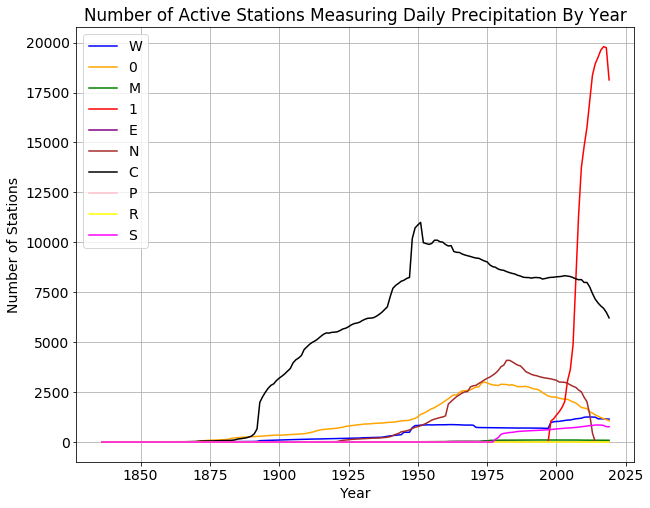

In [25]:
fig, ax = plot_station_counts(na_prcp_by_type,\
                    "Year", "Number of Stations",\
                    station_types, station_color_dict,\
                    "Number of Active Stations Measuring Daily Precipitation By Year",\
                    "type_prcp_by_year.png")

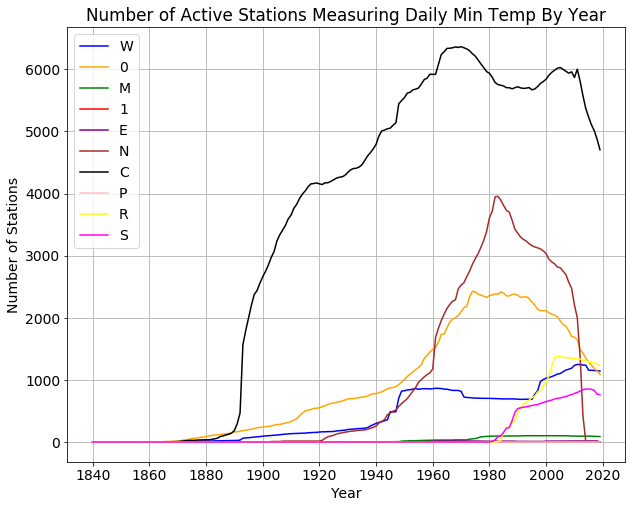

In [26]:
na_tmin = count_station_types_by_year(na_df, "TMIN")
fig, ax = plot_station_counts(na_tmin,\
                    "Year", "Number of Stations",\
                    station_types, station_color_dict,\
                    "Number of Active Stations Measuring Daily Min Temp By Year",\
                    "type_tmin_by_year.png")

In [27]:
na_tmin.tail()

,0,1,C,E,M,N,P,R,S,W,year
175,1287,0,5231,17,96,0,0,1292,853,1156,2015
176,1237,0,5107,17,95,0,0,1281,849,1156,2016
177,1185,0,5011,17,90,0,0,1272,832,1152,2017
178,1145,0,4873,17,90,0,0,1259,770,1149,2018
179,1091,0,4706,2,88,0,0,1234,764,1144,2019


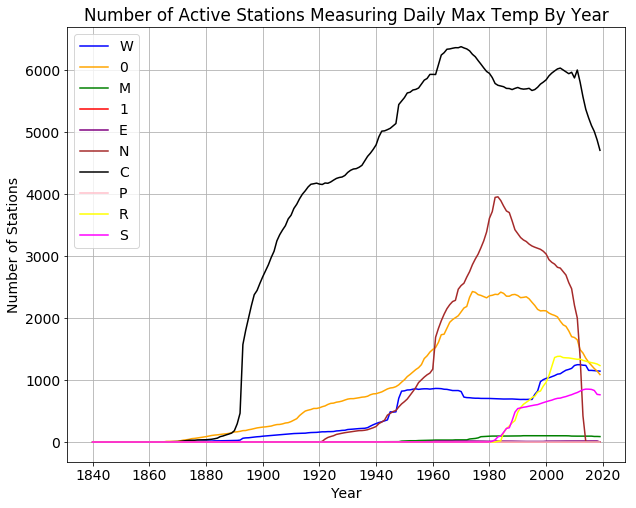

In [28]:
na_tmax = count_station_types_by_year(na_df, "TMAX")
fig, ax = plot_station_counts(na_tmax,\
                    "Year", "Number of Stations",\
                    station_types, station_color_dict,\
                    "Number of Active Stations Measuring Daily Max Temp By Year",\
                    "type_tmax_by_year.png")

In [29]:
na_tmax.tail()

,0,1,C,E,M,N,P,R,S,W,year
175,1288,0,5231,17,96,0,0,1292,853,1156,2015
176,1236,0,5108,17,95,0,0,1281,849,1156,2016
177,1186,0,5012,17,90,0,0,1272,832,1152,2017
178,1145,0,4875,17,90,0,0,1259,769,1149,2018
179,1089,0,4708,2,88,0,0,1234,763,1144,2019


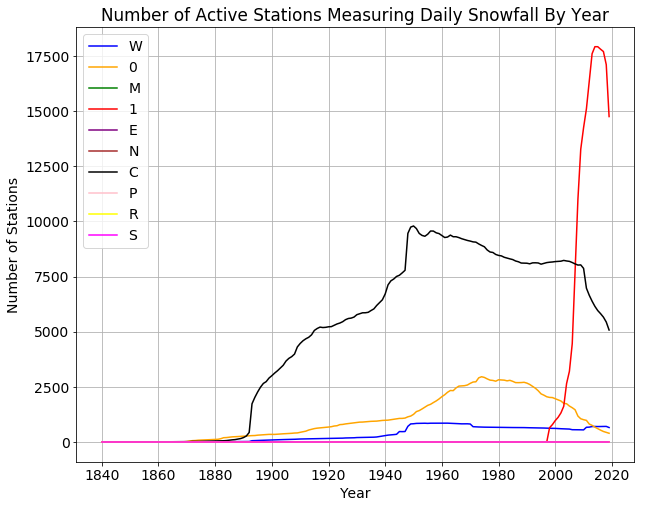

In [30]:
na_snow = count_station_types_by_year(na_df, "SNOW")
fig, ax = plot_station_counts(na_snow,\
                    "Year", "Number of Stations",\
                    station_types, station_color_dict,\
                    "Number of Active Stations Measuring Daily Snowfall By Year",\
                    "type_snow_by_year.png")

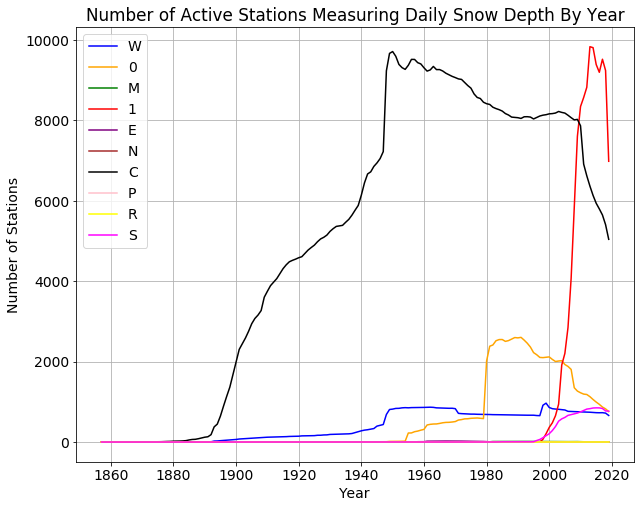

In [31]:
na_snwd = count_station_types_by_year(na_df, "SNWD")
fig, ax = plot_station_counts(na_snwd,\
                    "Year", "Number of Stations",\
                    station_types, station_color_dict,\
                    "Number of Active Stations Measuring Daily Snow Depth By Year",\
                    "type_snwd_by_year.png")

In [34]:
# Where are the type '0' stations coming from?
na_df.drop_duplicates('station_id').query('ctype == "0"').country.value_counts(normalize=True)

Canada                 0.996217
Panama                 0.000504
Greenland [Denmark]    0.000504
Nicaragua              0.000504
Honduras               0.000504
Costa Rica             0.000504
El Salvador            0.000378
Barbados               0.000126
Bahamas, The           0.000126
United States          0.000126
Dominica               0.000126
Guatemala              0.000126
Guadeloupe [France]    0.000126
Jamaica                0.000126
Name: country, dtype: float64

In [39]:
# Where are the type 'C' stations coming from?
na_df.drop_duplicates('station_id').query('ctype == "C"').country.value_counts(normalize=True)

United States                     0.991706
Puerto Rico [United States]       0.006662
Virgin Islands [United States]    0.001632
Name: country, dtype: float64

In [40]:
# Where are the type 'N' stations coming from?
na_df.drop_duplicates('station_id').query('ctype == "N"').country.value_counts()

Mexico    5170
Name: country, dtype: int64

In [41]:
# Where are the type '1' stations coming from?
na_df.drop_duplicates('station_id').query('ctype == "1"').country.value_counts()

United States                     35020
Canada                              876
Puerto Rico [United States]          54
Bahamas, The                         32
Virgin Islands [United States]        4
Name: country, dtype: int64

In [44]:
na_df.drop_duplicates('station_id')[['station_id', 'country', 'ctype']]\
.query('country == "United States" | country == "Mexico" | country == "Canada"')\
.groupby(['country', 'ctype']).agg('count')

station_id
country       ctype            
Canada        0            7901
              1             876
              W               3
Mexico        M              79
              N            5170
United States 0               1
              1           35020
              C           22479
              P               3
              R            1509
              S             859
              W            1742

In [48]:
na_major_types = na_df.drop_duplicates('station_id')[['country', 'ctype']]\
.query('country == "United States" | country == "Mexico" | country == "Canada"')
ct = pd.crosstab(na_major_types.country, na_major_types.ctype)
ct

ctype,0,1,C,M,N,P,R,S,W
country,,,,,,,,,
Canada,7901,876,0,0,0,0,0,0,3
Mexico,0,0,0,79,5170,0,0,0,0
United States,1,35020,22479,0,0,3,1509,859,1742


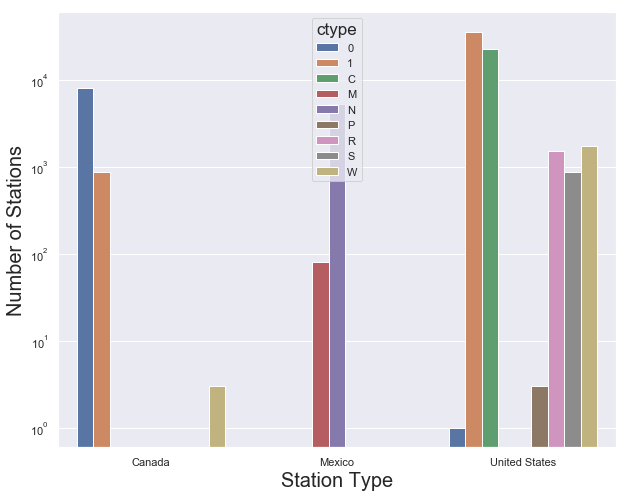

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d1a22a2860>)

In [58]:
# Plot the above cross tab
def plot_type_bars (df, filename, img_path=IMG_PATH):
    #sns.set(style="whitegrid")
    #sns.set_context("paper")
    sns.set(rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

    ct = pd.crosstab(df.country, df.ctype)
    stacked = ct.stack().reset_index().rename(columns={0:'value'})

    fig, ax = plt.subplots(figsize=(10,8))

    # plot grouped bar chart
    sns.barplot(x=stacked.country, y=stacked.value, hue=stacked.ctype)

    ax.set_xlabel("Station Type")
    
    #ax.set_title("")
    fig.get_axes()[0].set_yscale('log')
    ax.set_ylabel("Number of Stations")
    
    output_file = os.path.join(img_path, filename)
    fig.savefig(output_file)
    plt.show()

    return fig, ax

plot_type_bars(na_major_types, "type-bars")

In [59]:
na_df.drop_duplicates('station_id').country.value_counts()

United States                         61613
Canada                                 8780
Mexico                                 5249
Puerto Rico [United States]             211
Greenland [Denmark]                      69
Virgin Islands [United States]           43
Bahamas, The                             38
Panama                                   10
Honduras                                  8
Costa Rica                                6
Nicaragua                                 6
Cuba                                      6
Dominican Republic                        5
Trinidad and Tobago                       4
El Salvador                               3
Guadeloupe [France]                       3
Jamaica                                   3
Martinique [France]                       2
Antigua and Barbuda                       2
Saint Lucia                               2
Bermuda [United Kingdom]                  2
Saint Pierre and Miquelon [France]        1
Barbados                        